In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import binarize
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--4.data.json'
#fn = 'RubygemDigger--Steps--GenerateJsonForAllVersions--4.data.json.all.json'
with open(fn) as f:
    data = json.load(f)
    d = data["data"]
    spec = data["spec"]

print(spec)
#print(d[0])

n_obs = len(d)
print('nb_records:', n_obs)

{'version': 4, 'description': 'more code', 'min_number_of_gems': 12, 'min_months': 10, 'min_nloc': 5000, 'min_months_good': 20, 'history_months': 20, 'stopped_time_point': '2015-01-01 00:00:00 UTC', 'ignored_months_for_good': 10}
nb_records: 437


In [4]:
df = pd.io.json.json_normalize(d)

old_new_cols = {}
for name in df.columns:
    if name.startswith('stat'):
        old_new_cols[name] = name.split('.')[1]

df.rename(columns=old_new_cols, inplace=True)
df.head()

,label,name,Attribute,BooleanParameter,ClassVariable,ControlParameter,DataClump,DuplicateMethodCall,FeatureEnvy,InstanceVariableAssumption,...,metrics_perceivedcomplexity,nloc,nloc_rate,performance_,reek_total,security_,style_,total,warning_count,version
0,maintained,actionwebservice,4.284949,0.357079,0.000000,1.785395,1.249777,36.779147,7.498661,7.855740,...,1.249777,5601,0.24,0.535619,164.792001,0.000000,62.131762,0.714158,6.248884,1.2.6
1,maintained,adlint,0.753580,0.192403,0.016034,1.635428,0.721512,26.968526,11.223525,2.164537,...,0.048101,62369,0.34,0.240504,124.388719,0.064134,4.970418,0.096202,3.639629,3.2.14
2,maintained,amee,1.486252,0.619272,0.247709,0.371563,0.123854,26.628685,1.981670,3.467922,...,0.866980,8074,0.23,0.866980,74.808026,0.123854,42.605895,0.371563,7.926678,4.4.0
3,maintained,amq-client,1.084011,7.407407,0.361337,0.722674,0.180668,3.613369,1.264679,4.878049,...,0.180668,5535,0.02,1.084011,47.877145,0.180668,30.894309,0.361337,0.903342,1.0.4
4,maintained,antlr3,4.892856,0.453042,0.000000,1.132605,0.226521,17.940470,2.310515,3.443121,...,0.181217,22073,0.33,0.090608,77.742038,0.090608,17.170299,0.407738,3.624337,1.10.0


In [5]:
reek_columns =[
    'reek_total',
 'Attribute',
 'BooleanParameter',
 'ClassVariable',
 'ControlParameter',
 'DataClump',
 'DuplicateMethodCall',
 'FeatureEnvy',
 'InstanceVariableAssumption',
 'IrresponsibleModule',
 'LongParameterList',
 'LongYieldList',
 'ManualDispatch',
 'ModuleInitialize',
 'NestedIterators',
 'NilCheck',
 'PrimaDonnaMethod',
 'RepeatedConditional',
 'SubclassedFromCoreClass',
 'TooManyConstants',
 'TooManyInstanceVariables',
 'TooManyMethods',
 'TooManyStatements',
 'UncommunicativeMethodName',
 'UncommunicativeModuleName',
 'UncommunicativeParameterName',
 'UncommunicativeVariableName',
 'UnusedParameters',
 'UtilityFunction',
 'delta_Attribute',
 'delta_BooleanParameter',
 'delta_ClassVariable',
 'delta_ControlParameter',
 'delta_DataClump',
 'delta_DuplicateMethodCall',
 'delta_FeatureEnvy',
 'delta_InstanceVariableAssumption',
 'delta_IrresponsibleModule',
 'delta_LongParameterList',
 'delta_LongYieldList',
 'delta_ManualDispatch',
 'delta_ModuleInitialize',
 'delta_NestedIterators',
 'delta_NilCheck',
 'delta_PrimaDonnaMethod',
 'delta_RepeatedConditional',
 'delta_SubclassedFromCoreClass',
 'delta_TooManyConstants',
 'delta_TooManyInstanceVariables',
 'delta_TooManyMethods',
 'delta_TooManyStatements',
 'delta_UncommunicativeMethodName',
 'delta_UncommunicativeModuleName',
 'delta_UncommunicativeParameterName',
 'delta_UncommunicativeVariableName',
 'delta_UnusedParameters',
 'delta_UtilityFunction',
 'delta_reek_total']
lizard_columns = [
 'avg_ccn',
 'avg_nloc',
 'avg_token',
 'fun_count',
 'fun_rate',
 'nloc_rate',
 'warning_count',
 'delta_avg_ccn',
 'delta_avg_nloc',
 'delta_avg_token',
 'delta_fun_count',
 'delta_fun_rate',
 'delta_warning_count',

]

rubocop_columns = [
 'delta_lint_',
 'delta_lint_duplicate',
 'delta_metrics_abcsize',
 'delta_metrics_blocklength',
 'delta_metrics_blocknesting',
 'delta_metrics_classlength',
 'delta_metrics_cyclomaticcomplexity',
 'delta_metrics_linelength',
 'delta_metrics_methodlength',
 'delta_metrics_modulelength',
 'delta_metrics_parameterlists',
 'delta_metrics_perceivedcomplexity',
 'delta_nloc',
 'delta_nloc_rate',
 'delta_style_',
 'delta_total',
        'delta_performance_',
    'delta_security_',
    'delta_metrics_',
 'lint_',
 'lint_duplicate',
 'metrics_abcsize',
 'metrics_blocklength',
 'metrics_blocknesting',
 'metrics_classlength',
 'metrics_cyclomaticcomplexity',
 'metrics_linelength',
 'metrics_methodlength',
 'metrics_modulelength',
 'metrics_parameterlists',
 'metrics_perceivedcomplexity',
 'style_',
    'performance_',
    'security_',
    'metrics_',
 'total',
 ]

In [6]:
rows_with_NaNs = pd.isnull(df).any(1).nonzero()[0]
print(df.ix[rows_with_NaNs][['name', 'version']])

Empty DataFrame
Columns: [name, version]
Index: []


In [7]:
print(df.shape)
if len(rows_with_NaNs) > 0:
    df.dropna(inplace=True)
    print(df.shape)

(437, 57)


In [8]:
exclude = ['nloc',] #+ reek_columns + lizard_columns #+ reek_columns
features = [k for k, v in d[0]['stat'].items() if k not in exclude]
#features = [k for k in features if k.startswith("delta")]
print(features)


X = df[features]
y = (df.label == 'maintained').values.astype(int)

['avg_ccn', 'avg_nloc', 'avg_token', 'fun_count', 'warning_count', 'fun_rate', 'nloc_rate', 'style_', 'performance_', 'security_', 'lint_', 'lint_duplicate', 'metrics_', 'metrics_abcsize', 'metrics_blocklength', 'metrics_blocknesting', 'metrics_classlength', 'metrics_cyclomaticcomplexity', 'metrics_linelength', 'metrics_methodlength', 'metrics_modulelength', 'metrics_parameterlists', 'metrics_perceivedcomplexity', 'total', 'DuplicateMethodCall', 'FeatureEnvy', 'IrresponsibleModule', 'NilCheck', 'TooManyConstants', 'TooManyMethods', 'UncommunicativeVariableName', 'TooManyStatements', 'UnusedParameters', 'InstanceVariableAssumption', 'TooManyInstanceVariables', 'UtilityFunction', 'PrimaDonnaMethod', 'NestedIterators', 'DataClump', 'UncommunicativeMethodName', 'LongParameterList', 'UncommunicativeParameterName', 'ControlParameter', 'ManualDispatch', 'RepeatedConditional', 'Attribute', 'BooleanParameter', 'SubclassedFromCoreClass', 'UncommunicativeModuleName', 'ModuleInitialize', 'ClassVar

In [9]:
def label_counts_summary(data, label='unknow'):
    N = len(data)
    N_ones = data.sum()
    print('''
label: {}
nb. of observations: {}
nb. of ones (good gems): {}
frequency: {:.3f}
    '''.format(label, N, N_ones, 1.0 * N_ones / N))

In [10]:
label_counts_summary(y, label='Full set')

# split full dataset into 70% training and 30% test data
# test data is used only to evalute the model's prediction performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

label_counts_summary(y_train, label='Training set')
label_counts_summary(y_test, label='Test set')


label: Full set
nb. of observations: 437
nb. of ones (good gems): 139
frequency: 0.318
    

label: Training set
nb. of observations: 305
nb. of ones (good gems): 103
frequency: 0.338
    

label: Test set
nb. of observations: 132
nb. of ones (good gems): 36
frequency: 0.273
    


# Classify using LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))  # % of correct predictions

             precision    recall  f1-score   support

          0       0.74      0.72      0.73        96
          1       0.31      0.33      0.32        36

avg / total       0.62      0.61      0.62       132

0.613636363636


In [12]:
# generate predictions based on classification probability
y_pred_proba = model.predict_proba(X_test)

print(y_pred_proba[:3])

thresh = 0.5
y_pred_good = binarize([y_pred_proba[:,1]], thresh)[0]

print(metrics.accuracy_score(y_test, y_pred_good))

[[ 0.30942652  0.69057348]
 [ 0.49443086  0.50556914]
 [ 0.38527155  0.61472845]]
0.613636363636


## k-fold cross-validation

Split data into 10 blocks and use 1 as testing and 9 others as training. Repeat 10 times with different block as testing block. Good for verifying dependency on outliers.

In [13]:
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean(), scores.std())

[ 0.65909091  0.77272727  0.52272727  0.72727273  0.56818182  0.84090909
  0.65909091  0.59090909  0.65116279  0.66666667]
0.665873854827 0.0904368635065


# Classify using kNN

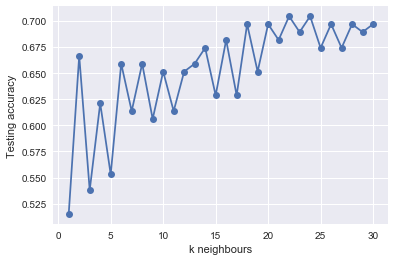

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_range = np.arange(1, 31)
a_scores = []

for nb in nb_range:
    model = KNeighborsClassifier(n_neighbors=nb)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    a_scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(nb_range, a_scores, 'o-')
plt.ylabel('Testing accuracy')
plt.xlabel('k neighbours')

In [15]:
from sklearn.grid_search import GridSearchCV

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)


# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6819221967963387
{'n_neighbors': 27, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')


# Ensemble

In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [18]:

dtrain = list(x for x in d if x["stat"]["age"]!=0 and not(x["name"].startswith("t") or  x["name"].startswith("s") or x["name"].startswith("r") or x["name"].startswith("d")))

dtest = list(x for x in d if  x["stat"]["age"]!=0 and (x["name"].startswith("t") or  x["name"].startswith("s") or x["name"].startswith("r")  or x["name"].startswith("d")))

dftrain = pd.io.json.json_normalize(dtrain)
dftest = pd.io.json.json_normalize(dtest)
dftrain.rename(columns=old_new_cols, inplace=True)
dftest.rename(columns=old_new_cols, inplace=True)

KeyError: 'age'

In [ ]:
def manual_tested_ensemble_bagging_with(model):
    accuracies = 0.0
    estimator = model
    X_train = dftrain[features]
    y_train = (dftrain.label == 'maintained').values.astype(int)

    X_test = dftest[features]
    y_test = (dftest.label == 'maintained').values.astype(int)

    estimator.fit(X_train, y_train)

    y_pred = estimator.predict(X_test)
    thresh = 0.5
    y_pred_good = binarize([y_pred[:]], thresh)[0]
    accuracies +=metrics.accuracy_score(y_test, y_pred_good)

    return accuracies


In [ ]:
manual_tested_ensemble_bagging_with(DecisionTreeRegressor())

In [ ]:
from sklearn.ensemble import BaggingClassifier
manual_tested_ensemble_bagging_with(BaggingClassifier(grid.best_estimator_, max_samples=0.5, max_features=0.5))

In [ ]:
manual_tested_ensemble_bagging_with(BaggingClassifier(LogisticRegression()))

In [19]:
def ensemble_bagging_with(model):
    accuracies = 0.0
    for i in range(5):
        estimator = model
        X = df[features]
        y = (df.label == 'maintained').values.astype(int)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        estimator.fit(X_train, y_train)

        y_pred = estimator.predict(X_test)
        thresh = 0.5
        y_pred_good = binarize([y_pred[:]], thresh)[0]
        accuracies +=metrics.accuracy_score(y_test, y_pred_good)

    return accuracies/5

In [20]:
ensemble_bagging_with(DecisionTreeRegressor())

0.57121212121212106

In [21]:
from sklearn.ensemble import BaggingClassifier
ensemble_bagging_with(BaggingClassifier(grid.best_estimator_))

0.68333333333333335

In [22]:
ensemble_bagging_with(BaggingClassifier(LogisticRegression()))

0.68636363636363629